# Spotify Data Analyis

In this project we'll do some analysis of music data   

In [10]:
import datetime as dt
import requests
import random
import time

import cloudscraper

scraper = cloudscraper.create_scraper()  # returns a CloudScraper instance

start_date = dt.date(2021, 5, 9)
# end_date = dt.date(2021, 5,11)
end_date = dt.date(2021, 5, 9)
delta = dt.timedelta(days=1)

while start_date <= end_date:
    print(start_date)
    start_date += delta
    headers = {'Content-type': 'text/csv'}
    link = 'https://spotifycharts.com/regional/global/daily/%s/download' % start_date
    response = scraper.get(link, headers=headers)
    print(response.text)
    time.sleep(random.randint(5,10))


2021-05-09
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>

<title>Attention Required! | Cloudflare</title>

<meta name="captcha-bypass" id="captcha-bypass" />
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<s

In [69]:
import pandas as pd
import datetime as dt
import numpy as np

c=pd.read_csv('../../datasets/spotify/spotify-top-200-global.csv')

In [70]:
c.shape

(44200, 12)

In [71]:
c.head()

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-06,Starboy,230453,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-06,Closer,244960,False,1,17742887,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),251088,False,1,4296325,"['dance pop', 'edm', 'pop', 'pop dance', 'post..."
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-06,Encore,205946,False,13,7312319,"['dance pop', 'edm', 'electronic trap', 'pop',..."
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-06,I Don’t Wanna Live Forever (Fifty Shades Darker),245200,False,1,15423979,"['dance pop', 'pop', 'post-teen pop', 'uk pop']"


In [277]:
c['Week']= pd.to_datetime(c['Week'])
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   44200 non-null  int64         
 1   Track                  44195 non-null  object        
 2   Artist                 44195 non-null  object        
 3   Streams                44200 non-null  int64         
 4   Link                   44200 non-null  object        
 5   Week                   44200 non-null  datetime64[ns]
 6   Album_Name             44195 non-null  object        
 7   Duration_MS            44200 non-null  int64         
 8   Explicit               44200 non-null  bool          
 9   Track_Number_on_Album  44200 non-null  int64         
 10  Artist_Followers       44200 non-null  int64         
 11  Artist_Genres          44200 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(5)
memory us

Get all number ones

In [278]:
number_one_ranks = c[c.Rank <= 1]

Now get the list of number ones that are unique and get all of the data about these.

How do we get all of the unique elements in a column?

In [283]:
number_one_list = number_one_ranks.Track.unique()
# number_one_list = np.array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
#        'Mi Gente', 'Look What You Made Me Do',
#        'Too Good At Goodbyes - Edit', 'rockstar',
#     'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
#        'Nice For What', 'Better Now', 'This Is America', 'SAD!',
#        'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
#        'I Love It (& Lil Pump)',
#        'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
#        'MIA (feat. Drake)', 'thank u, next',
#        #'All I Want for Christmas Is You',
#        'Sunflower - Spider-Man: Into the Spider-Verse',
#        # '7 rings',
#        'bad guy',
#        "I Don't Care (with Justin Bieber)",
#        # 'Señorita',
#        #'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
#        'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
#        'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
#        'cardigan', 'Savage Love (Laxed - Siren Beat)',
#        'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann dior)',
#        'positions', 'DÁKITI', 'drivers license',
#        'Peaches (feat. Daniel Caesar & Giveon)',
#        'MONTERO (Call Me By Your Name)'
# ])
# number_one_list = np.array([
#        'All I Want for Christmas Is You',
# ])
# number_one_list = np.array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
#        'Mi Gente', 'Look What You Made Me Do',
#        'Too Good At Goodbyes - Edit', 'rockstar',
#        'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
#        'Nice For What', 'Better Now', 'This Is America', 'SAD!',
#        'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
#        'I Love It (& Lil Pump)',
#        'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
#        'MIA (feat. Drake)', 'thank u, next',
#        'All I Want for Christmas Is You',
#        'Sunflower - Spider-Man: Into the Spider-Verse', '7 rings',
#        'bad guy', "I Don't Care (with Justin Bieber)", 'Señorita',
#        'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
#        'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
#        'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
#        'cardigan', 'Savage Love (Laxed - Siren Beat)',
#        'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann dior)',
#        'positions', 'DÁKITI', 'drivers license',
#        'Peaches (feat. Daniel Caesar & Giveon)',
#        'MONTERO (Call Me By Your Name)'])
number_one_list

array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
       'Mi Gente', 'Look What You Made Me Do',
       'Too Good At Goodbyes - Edit', 'rockstar',
       'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
       'Nice For What', 'Better Now', 'This Is America', 'SAD!',
       'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
       'I Love It (& Lil Pump)',
       'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
       'MIA (feat. Drake)', 'thank u, next',
       'All I Want for Christmas Is You',
       'Sunflower - Spider-Man: Into the Spider-Verse', '7 rings',
       'bad guy', "I Don't Care (with Justin Bieber)", 'Señorita',
       'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
       'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
       'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
       'cardigan', 'Savage Love (Laxed - Siren Beat)',
       'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann d

Now get all of the rows in the data that have that track

Something like 
df.loc[df['favorite_color'].isin(array)]

In [284]:
number_ones = c.loc[c.Track.isin(number_one_list)]

In [285]:
number_ones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   2771 non-null   int64         
 1   Track                  2771 non-null   object        
 2   Artist                 2771 non-null   object        
 3   Streams                2771 non-null   int64         
 4   Link                   2771 non-null   object        
 5   Week                   2771 non-null   datetime64[ns]
 6   Album_Name             2771 non-null   object        
 7   Duration_MS            2771 non-null   int64         
 8   Explicit               2771 non-null   bool          
 9   Track_Number_on_Album  2771 non-null   int64         
 10  Artist_Followers       2771 non-null   int64         
 11  Artist_Genres          2771 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(5)
memory usa

In [286]:
number_ones[['Week','Rank', 'Track', 'Streams']]

,Week,Rank,Track,Streams
0,2017-01-06,1,Starboy,25734078
200,2017-01-13,1,Shape of You,51095759
202,2017-01-13,3,Starboy,24261229
400,2017-01-20,1,Shape of You,51021927
403,2017-01-20,4,Starboy,24480907
...,...,...,...,...
44131,2021-04-16,132,Savage Love (Laxed - Siren Beat),6206788
44152,2021-04-16,153,HIGHEST IN THE ROOM,5752842
44153,2021-04-16,154,7 rings,5709792
44159,2021-04-16,160,Rain On Me (with Ariana Grande),5598611


In [287]:
#streams_by_song = number_ones.pivot(index=['Week','Rank'], columns='Track',values='Streams')
streams_by_song = number_ones.pivot_table(index=['Week'], columns='Track',values='Streams')
streams_by_song

Track,7 rings,All I Want for Christmas Is You,Better Now,Blinding Lights,Call Out My Name,Circles,Dance Monkey,Despacito - Remix,DÁKITI,God's Plan,...,The Box,This Is America,Too Good At Goodbyes - Edit,WAP (feat. Megan Thee Stallion),bad guy,cardigan,drivers license,positions,rockstar,"thank u, next"
Week,,,,,,,,,,,,,,,,,,,,,
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,5629269.0,NaN,NaN,22206539.0,NaN,8106571.0,9233403.0,NaN,21712800.0,NaN,...,6817523.0,NaN,NaN,9555183.0,6903037.0,NaN,31682433.0,12719418.0,NaN,NaN
2021-03-26,5651767.0,NaN,NaN,21727461.0,NaN,8009560.0,9192138.0,NaN,21050177.0,NaN,...,6676728.0,NaN,NaN,9373076.0,6977819.0,NaN,29333748.0,12587726.0,NaN,NaN
2021-04-02,5644122.0,NaN,NaN,21404033.0,NaN,7866868.0,9345558.0,NaN,20641131.0,NaN,...,6752080.0,NaN,NaN,9186724.0,6790925.0,NaN,27143454.0,12105596.0,NaN,NaN


In [239]:
# streams_by_song = streams_by_song.droplevel('Rank')
# streams_by_song

<AxesSubplot:xlabel='Week'>

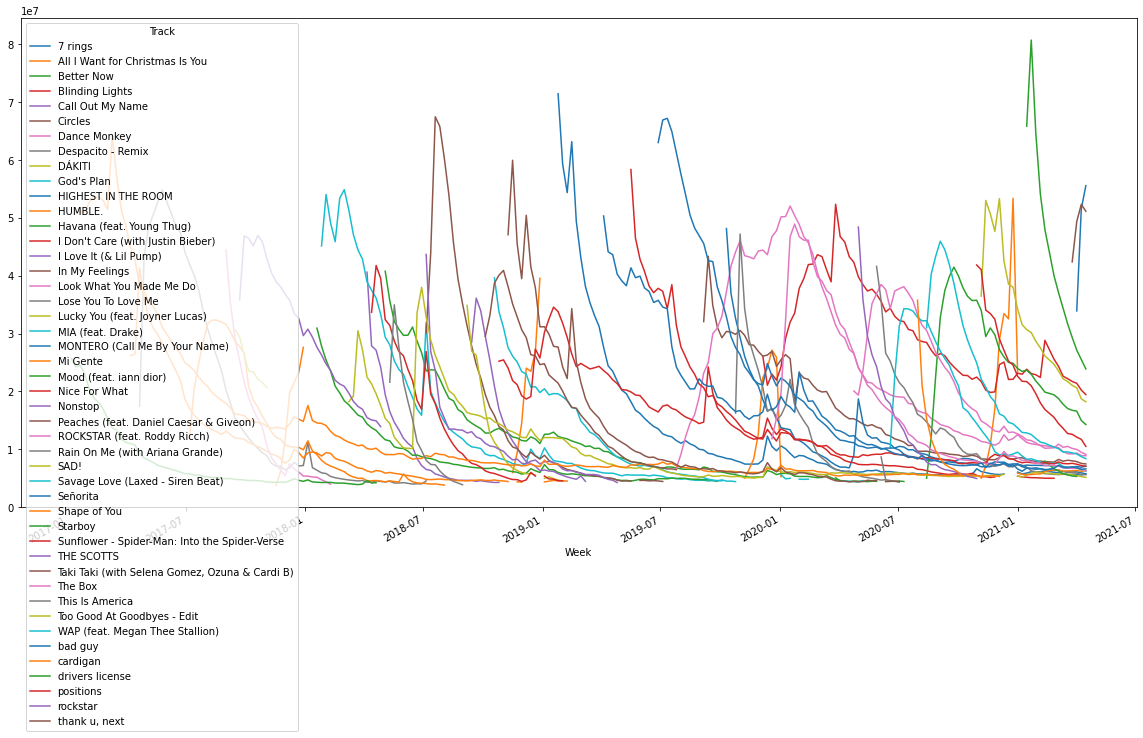

In [288]:
streams_by_song.plot(figsize=(20,10),kind='line')
